In [2]:
import pandas as pd 
import os 
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
data = pd.read_csv('../dataset/data.csv', encoding="ISO-8859-1")

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [5]:
data['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [6]:
data.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
data.dropna(axis=0, subset=['CustomerID'], inplace=True)
data.drop_duplicates(inplace = True)

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Customers and products

In [9]:
pd.DataFrame([{'products': len(data['StockCode'].value_counts()),
              'transactions': len(data['InvoiceNo'].value_counts()),
              'customers': len(data['CustomerID'].value_counts()),
              }], columns = ['products', 'transactions', 'customers'], index=['quality'])

,products,transactions,customers
quality,3684,22190,4372


In [10]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Number of products purchased in every transaction

In [11]:
df_temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
df_temp = df_temp.rename(columns={'InvoiceDate': 'Number of products'})
df_temp

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
22185,18283.0,579673,50
22186,18283.0,580872,50
22187,18287.0,554065,29
22188,18287.0,570715,38


/home/dmk/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of products', ylabel='count'>

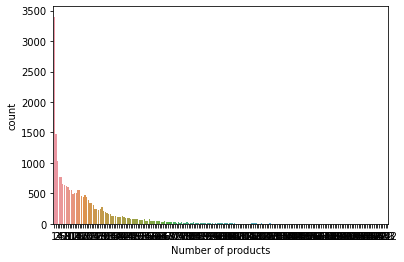

In [12]:
sns.countplot(df_temp['Number of products'])

In [13]:
df_temp.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.098423
std,1733.149624,23.363888
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


### Order cancled

In [14]:
df_temp['order_canceled'] = df_temp['InvoiceNo'].apply(lambda x: int('C' in x))

In [15]:
df_temp

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12347.0,537626,31,0
3,12347.0,542237,29,0
4,12347.0,549222,24,0
...,...,...,...,...
22185,18283.0,579673,50,0
22186,18283.0,580872,50,0
22187,18287.0,554065,29,0
22188,18287.0,570715,38,0


In [16]:
print(f"Number percentage of orders canceld: {df_temp['order_canceled'].sum() / len(df_temp) *100}%")

Number percentage of orders canceld: 16.466876971608833%


In [17]:
display(data.sort_values('CustomerID')[:10])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
286623,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland
72260,542237,84991,60 TEATIME FAIRY CAKE CASES,24,2011-01-26 14:30:00,0.55,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14944,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14946,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14947,537626,22805,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
148285,549222,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-04-07 10:43:00,4.25,12347.0,Iceland


In above dataframe, we see that when an order is canceled, we have another transactions in the dataframe, mostly indentical exept of the Quantity and InvoiceDate variable

In [18]:
df_check = data[data['Quantity'] < 0][['CustomerID', 'Quantity', 'StockCode', 'Description', 'UnitPrice']]

for index, row in tqdm(df_check.iterrows(), total=len(df_check)):
    if data[(data['CustomerID'] == row['CustomerID']) & (data['Quantity'] == -row['Quantity']) & (data['Description'] == row['Description'])].shape[0] == 0:
        print(df_check.loc[index])
        print("Hypothesis isn't true")
        break

  0%|                                                                                        | 0/8872 [00:00<?, ?it/s]

CustomerID      14527.0
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
Hypothesis isn't true


In [19]:
df_check = data[(data['Quantity'] < 0) & (data['Description'] != 'Discount')][['CustomerID', 'Quantity', 'StockCode', 'Description', 'UnitPrice']]

for index, row in tqdm(df_check.iterrows(), total=len(df_check)):
    if data[(data['CustomerID'] == row['CustomerID']) & (data['Quantity'] == -row['Quantity']) & (data['Description'] == row['Description'])].shape[0] == 0:
        print(df_check.loc[index])
        print("Hypothesis isn't true")
        break

  0%|                                                                                        | 0/8795 [00:00<?, ?it/s]

CustomerID                             15311.0
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
Hypothesis isn't true


In [20]:
df_cleaned = data.copy(deep=True)
df_cleaned['QuantityCanceled'] = 0

In [21]:

entry_to_remove, dobtfull_entry = [], []

for idx, row in tqdm(data.iterrows(), total=len(data)):
    if row['Quantity'] > 0 or row['Description'] == "Discount":
        continue 
    
    df_test = data[(data['CustomerID'] == row['CustomerID']) & 
                  (data['StockCode'] == row['StockCode']) &
                  (data['InvoiceDate'] < row['InvoiceDate']) &
                  (data['Quantity'] > 0)].copy()
    
    if len(df_test) == 0:
        dobtfull_entry.append(idx)
    
    elif len(df_test) == 1:
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = - row['Quantity']
        entry_to_remove.append(idx)
    elif len(df_test) > 1:
        df_test.sort_index(axis=0, ascending=False, inplace=True)
        for index, row_df_test in df_test.iterrows():
            if row_df_test['Quantity'] < -row['Quantity']:
                continue 
            df_cleaned.loc[index, 'QuantityCanceled'] = -row['Quantity']
            entry_to_remove.append(idx)
            break
            
        
    

100%|███████████████████████████████████████████████████████████████████████| 401604/401604 [05:38<00:00, 1187.20it/s]


In [22]:
print(len(dobtfull_entry))
print(len(entry_to_remove))

1226
7521


In [23]:
df_cleaned.drop(dobtfull_entry, axis=0, inplace=True)
df_cleaned.drop(entry_to_remove, axis=0, inplace=True)

In [24]:
df_cleaned.to_csv('../dataset/df_cleaned.csv')

# StockCode

In [3]:
df_cleaned = pd.read_csv('../dataset/df_cleaned.csv')

In [6]:
df_cleaned.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
print('Number of unique stock code:', df_cleaned['StockCode'].unique().shape[0])

Number of unique stock code: 3666


Count number of stock code

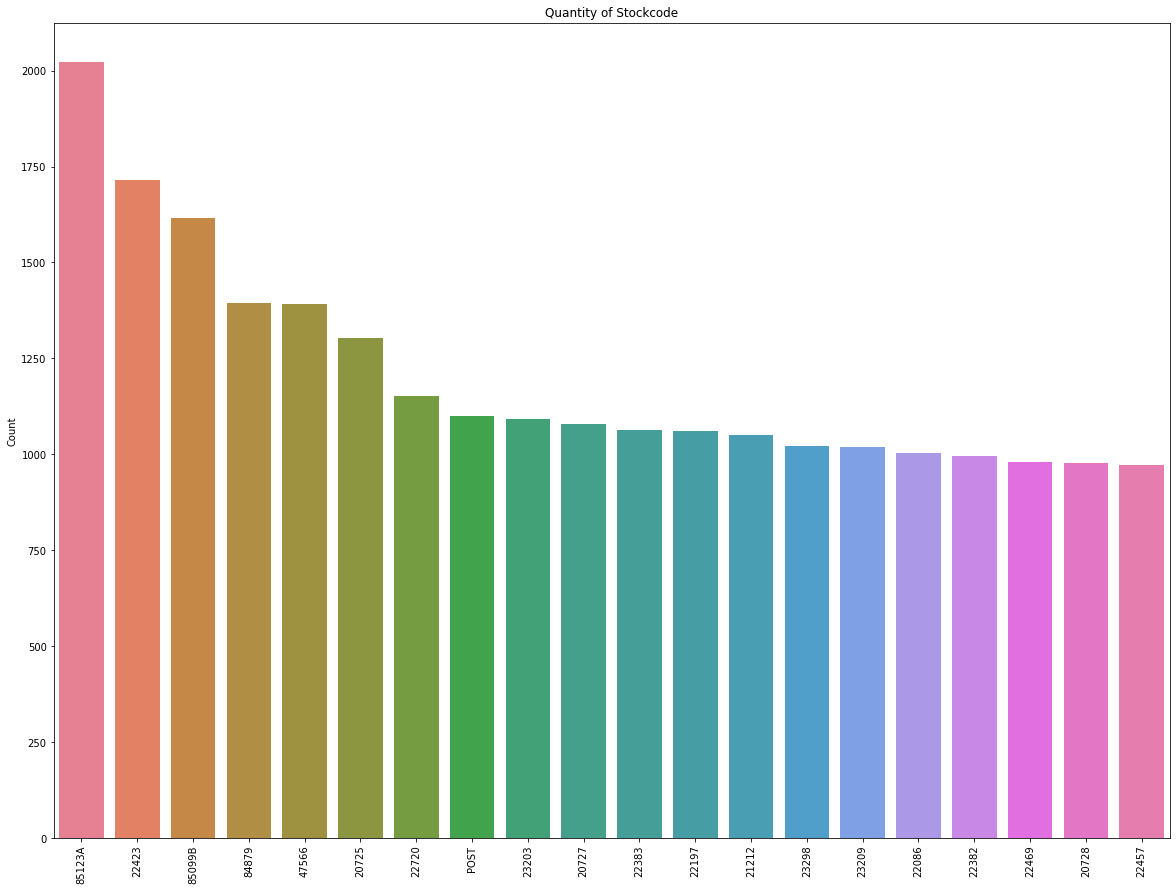

In [8]:
quantity_stock_code = df_cleaned['StockCode'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(quantity_stock_code[:20].index,quantity_stock_code[:20].values,orient='v',palette="husl")
plt.ylabel("Count")
plt.title("Quantity of Stockcode")
plt.xticks(rotation=90)
plt.show()

Special stock code

In [9]:
list_stock_code = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_stock_code

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)


```
POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE
```

In [10]:
quantity_special_code = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].value_counts()

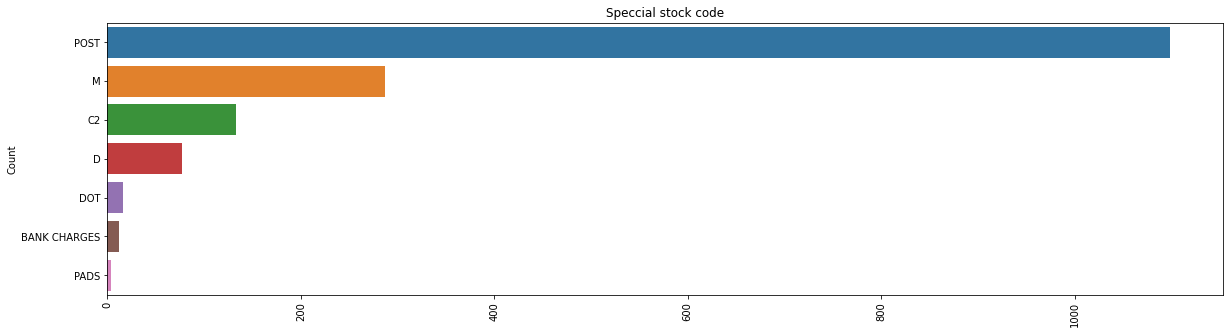

In [11]:
plt.figure(figsize=(20,5))
sns.barplot(quantity_special_code.values, quantity_special_code.index)
plt.ylabel("Count")
plt.title("Speccial stock code")
plt.xticks(rotation=90)
plt.show()

Retailer does not separate well between special transaction and customer transaction.
So drop this special transaction

In [12]:
data = df_cleaned[~df_cleaned['StockCode'].isin(quantity_special_code.index)].copy()

In [13]:
print('Number of unique stock code:', df_cleaned['StockCode'].unique().shape[0])
print('Number of unique stock code after remove special transaction:', data['StockCode'].unique().shape[0])

Number of unique stock code: 3666
Number of unique stock code after remove special transaction: 3659


# UnitPrice

In [14]:
data['UnitPrice'].describe()

count    391229.000000
mean          2.874110
std           4.284539
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [15]:
data = data[data.UnitPrice > 0]

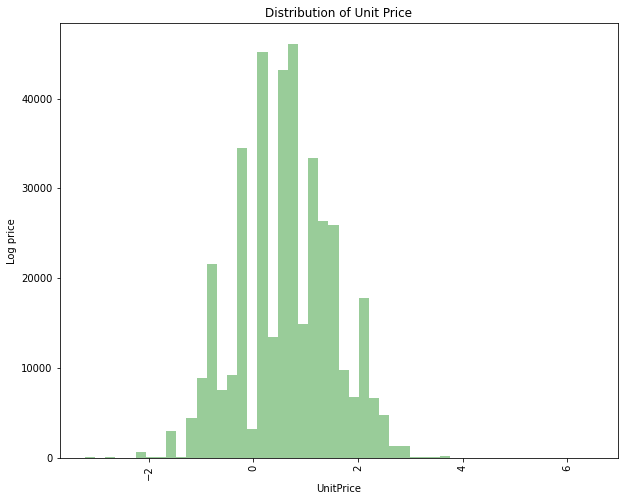

In [16]:
plt.subplots(figsize=(10,8))
sns.distplot(np.log(data.UnitPrice), kde=False, color="green")
plt.ylabel("Log price")
plt.title("Distribution of Unit Price")
plt.xticks(rotation=90)
plt.show()

In [17]:
low_price = np.exp(-2)
high_price = np.exp(3)
print(f'Low price: {low_price}, hight price: {high_price}')

Low price: 0.1353352832366127, hight price: 20.085536923187668


In [18]:
data = data[(data.UnitPrice >= low_price) & (data.UnitPrice <= high_price)]

# Quantities

In [19]:
data['Quantity'].describe()

count    389620.000000
mean         13.039772
std         180.959595
min        -152.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

drop row has quantities < 0

In [20]:
data = data[data['Quantity']> 0 ]

In [21]:
data['Quantity'].describe()

count    389574.000000
mean         13.044192
std         180.969471
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

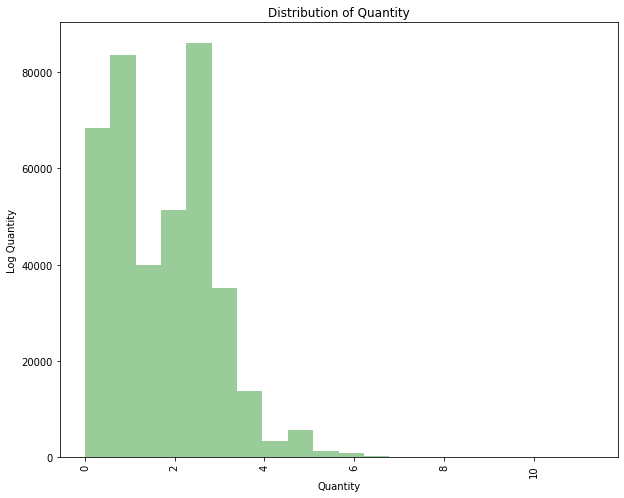

In [22]:
plt.subplots(figsize=(10,8))
sns.distplot(np.log(data.Quantity), kde=False, color="green",bins=20)
plt.ylabel("Log Quantity")
plt.title("Distribution of Quantity")
plt.xticks(rotation=90)
plt.show()

In [23]:
high_quantity = np.exp(5)
print('High quantity:',high_quantity)
print(f"Number of quantity cover 95% of data: {np.quantile(data.Quantity, 0.95)}")

High quantity: 148.4131591025766
Number of quantity cover 95% of data: 36.0


In [24]:
data = data[data.Quantity < high_quantity]

# Revenue

In [25]:
data['revenue'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

In [26]:
customer_unit = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['revenue'].sum()

In [27]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate_int'] = data['InvoiceDate'].astype('int64')
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].mean()
customer_unit.loc[:,'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])
data.drop(columns=['InvoiceDate_int'],inplace=True)

In [28]:
customer_unit = customer_unit[customer_unit['revenue']>0]

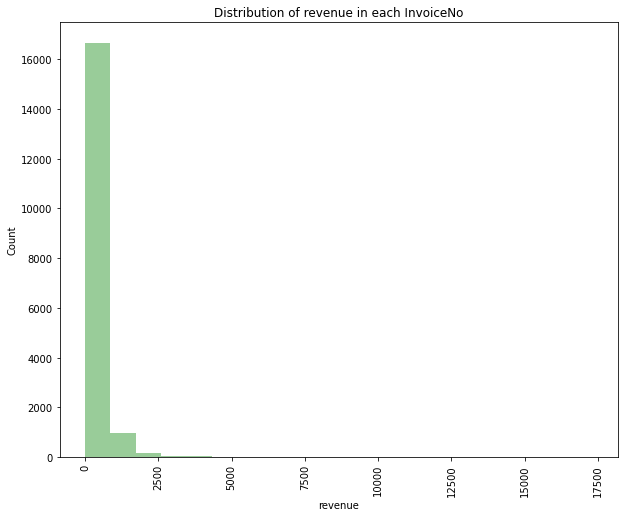

In [29]:
plt.subplots(figsize=(10,8))
sns.distplot(customer_unit.revenue, kde=False, color="green",bins=20)
plt.ylabel("Count")
plt.title("Distribution of revenue in each InvoiceNo")
plt.xticks(rotation=90)
plt.show()

In [30]:
sub_revenue = [0,50,100,250,500,1000,2500,5000,customer_unit.revenue.max()]

In [31]:
count_price = []
for i, price in enumerate(sub_revenue):
    if i == 0: continue
    val = customer_unit[(customer_unit['revenue'] < price) &
                       (customer_unit['revenue'] => sub_revenue[i-1])]['revenue'].count()
    count_price.append(val)

SyntaxError: invalid syntax (775756957.py, line 5)

In [ ]:
label = [f'{sub_revenue[i-1]} <= x < {price}' for i,price in enumerate(sub_revenue) if price != 0]

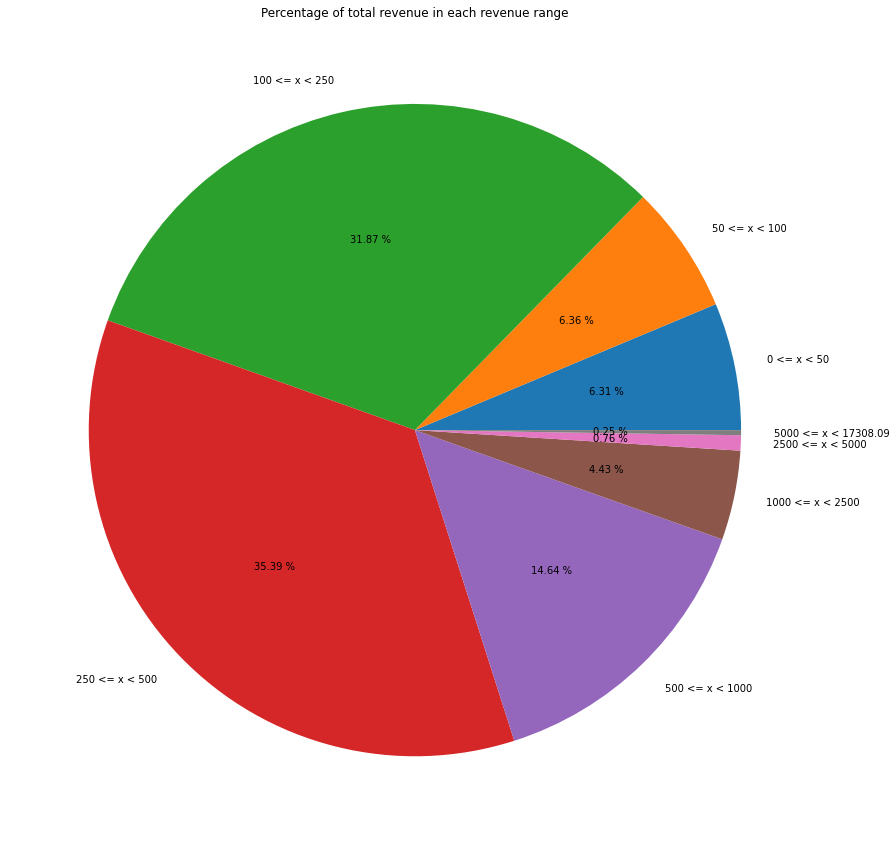

In [ ]:
plt.subplots(figsize=(15,15))
plt.pie(x=count_price,labels=label,autopct = lambda x: f'{round(x,2)} %')
plt.title("Percentage of total revenue in each revenue range")
plt.xticks(rotation=90)
plt.show()

In [33]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
...,...,...,...,...,...,...,...,...,...,...
392852,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0,10.20
392853,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0,12.60
392854,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60
392855,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0,16.60


In [32]:
data.to_csv('../dataset/data_eda02.csv',index=False)